<a href="https://colab.research.google.com/github/yifan-zhou19/Policy_migration/blob/master/APM(video_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

  
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

def createPlot():     
    fig = plt.figure(1,facecolor='white',figsize=[6,20]) 
    # 
    fig.clf() 
    


    createPlot.ax1 = plt.subplot(111,frameon=False) 
    plotNode('a decision node',(0.5,0.1),(0.1,0.5),decisionNode) 
    plotNode('a leaf node',(0.8,0.1),(0.3,0.8),leafNode) 
    plt.show() 




def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    
    
    secondDict = myTree[firstStr]
    
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
          
            numLeafs += getNumLeafs(secondDict[key])
        else : numLeafs += 1
    return numLeafs
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else : thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

#输出预先存储的树信息
def retrieveTree(i):
    listOfTrees = [{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},
                   {'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',
                   1:'yes'}},1:'no'}}}}]
    #定义了两个字典
    return listOfTrees[i]

#plotTree 函数
def plotMidText(cntrpt,parentPt,txtString):
    #计算父节点与子节点的中间位置，在此处添加文本信息
    xMid = (parentPt[0] - cntrpt[0])/2.0 + cntrpt[0]
    yMid = (parentPt[1] - cntrpt[1])/2.0 + cntrpt[1]
    createPlot.ax1.text(xMid,yMid,txtString)
def plotTree(myTree,parentPt,nodeTxt):
  
    numLeafs = getNumLeafs(myTree)
    
    depth = getTreeDepth(myTree)
    
    firstStr = list(myTree.keys())[0]
    cntrpt = (plotTree.x0ff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,plotTree.y0ff)
    #cntrPt
    plotMidText(cntrpt,parentPt,nodeTxt)
    
    plotNode(firstStr,cntrpt,parentPt,decisionNode)
    secondDict = myTree[firstStr]
    plotTree.y0ff = plotTree.y0ff - 1.0/plotTree.totalD
    
    for key in secondDict.keys():
         if type(secondDict[key]).__name__=='dict':
           
             plotTree(secondDict[key],cntrpt,str(key))
         else:
             plotTree.x0ff = plotTree.x0ff + 1.0/plotTree.totalW
             plotNode(secondDict[key],(plotTree.x0ff,plotTree.y0ff),cntrpt,
                      leafNode)
             plotMidText((plotTree.x0ff,plotTree.y0ff),cntrpt,str(key))
    plotTree.y0ff = plotTree.y0ff + 1.0/plotTree.totalD
def createPlot(inTree):
  
    fig = plt.figure(1,facecolor='white',figsize=[40,6]) 
    
    fig.clf()
    
    axprops = dict(xticks=[],yticks=[])
    
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    
    plotTree.totalW = float(getNumLeafs(inTree))
    
    plotTree.totalD = float(getTreeDepth(inTree))
    
    plotTree.x0ff = -0.5/plotTree.totalW;
    
    plotTree.y0ff = 1.0;
    plotTree(inTree, (0.5,1.0), '')   
    plt.show()

In [ ]:

'''
#define ABAC policy (health care samples)
U=[{'uid':'oncNurse1','position':'nurse','ward':'oncWard'},
{'uid':'oncNurse2','position':'nurse','ward':'oncWard'},
{'uid':'carNurse1','position':'nurse','ward':'carWard'}, 
{'uid':'carNurse2','position':'nurse','ward':'carWard'}, 
{'uid':'oncDoc1','position':'doctor','specialties':['oncology'],'teams':['oncTeam1','oncTeam2']},
{'uid':'oncDoc2','position':'doctor','specialties':['oncology'],'teams':['oncTeam1']},
{'uid':'oncDoc3','position':'doctor','specialties':['oncology'],'teams':['oncTeam2']},
{'uid':'oncDoc4','position':'doctor','specialties':['oncology'],'teams':['oncTeam2']},
{'uid':'carDoc1','position':'doctor','specialties':['cardiology'],'teams':['carTeam1']},
{'uid':'carDoc2','position':'doctor','specialties':['cardiology'],'teams':['carTeam2']},
{'uid':'anesDoc1','position':'doctor','specialties':['anesthesiology},'],'teams':['oncTeam1','carTeam1']},
{'uid':'doc1','position':'doctor','specialties':['oncology','pediatrics']},
{'uid':'doc2','position':'doctor','specialties':['cardiology','neurology']},
{'uid':'oncPat1','ward':'oncWard'},
{'uid':'oncPat2','ward':'oncWard'},
{'uid':'carPat1','ward':'carWard'},
{'uid':'carPat2','ward':'carWard'},
{'uid':'oncAgent1','agentFor':['oncPat2']},
{'uid':'oncAgent2','agentFor':['oncPat2']},
{'uid':'carAgent1','agentFor':['oncPat2']},
{'uid':'carAgent2','agentFor':['oncPat2']}
]
R=[{'rid':'oncPat1oncItem','type':'HRitem','author':'oncDoc1','patient':'oncPat1',
   'topics':['oncology'],'treatingTeam':'oncTeam1','ward':'oncWard'},
{'rid':'oncPat1nursingItem','type':'HRitem','author':'oncNurse2','patient':'oncPat1',
   'topics':['nursing'],'treatingTeam':'oncTeam1','ward':'oncWard'},
{'rid':'oncPat1noteItem','type':'HRitem','author':'oncPat1','patient':'oncPat1',
   'topics':['note'],'treatingTeam':'oncTeam1','ward':'oncWard'},      
{'rid':'oncPat1HR','type':'HR','patient':'oncPat1',
 'treatingTeam':'oncTeam1','ward':'oncWard'},

{'rid':'oncPat2oncItem','type':'HRitem','author':'doc1','patient':'oncPat2',
   'topics':['oncology'],'treatingTeam':'oncTeam2','ward':'oncWard'},
{'rid':'oncPat2nursingItem','type':'HRitem','author':'oncNurse1','patient':'oncPat2',
   'topics':['nursing'],'treatingTeam':'oncTeam2','ward':'oncWard'},
{'rid':'oncPat2noteItem','type':'HRitem','author':'oncAgent1','patient':'oncPat2',
   'topics':['note'],'treatingTeam':'oncTeam2','ward':'oncWard'},      
{'rid':'oncPat2HR','type':'HR','patient':'oncPat2',
 'treatingTeam':'oncTeam2','ward':'oncWard'},

{'rid':'oncPat1carItem','type':'HRitem','author':'carDoc2','patient':'carPat1',
   'topics':['cardiology'],'treatingTeam':'carTeam1','ward':'carWard'},
{'rid':'carPat1nursingItem','type':'HRitem','author':'carNurse1','patient':'carPat1',
   'topics':['nursing'],'treatingTeam':'carTeam1','ward':'carWard'},
{'rid':'carPat1noteItem','type':'HRitem','author':'carPat1','patient':'carPat1',
   'topics':['note'],'treatingTeam':'carTeam1','ward':'carWard'},      
{'rid':'carPat1HR','type':'HR','patient':'carPat1',
 'treatingTeam':'carTeam1','ward':'carWard'}, 

{'rid':'oncPat2carItem','type':'HRitem','author':'doc2','patient':'carPat2',
   'topics':['cardiology'],'treatingTeam':'carTeam2','ward':'carWard'},
{'rid':'carPat2nursingItem','type':'HRitem','author':'carNurse2','patient':'carPat2',
   'topics':['nursing'],'treatingTeam':'carTeam2','ward':'carWard'},
{'rid':'carPat2noteItem','type':'HRitem','author':'carAgent1','patient':'carPat2',
   'topics':['note'],'treatingTeam':'carTeam2','ward':'carWard'},      
{'rid':'carPat2HR','type':'HR','patient':'carPat2',
 'treatingTeam':'carTeam2','ward':'carWard'},  
]
UA=['position','uward','agentFor','specialties','teams','uid']
RA=['type','author','patient', 'topics','rid','treatingTeam','rward']
O=['addItem','addNote', 'read','changeScore', 'assignGrade','read','write','checkStatus','setStatus']
RU=[{# # a nurse can add an item in a HR for a patient in the ward in which he/she
  'expressions':[{'eu':{'position':[('is','nurse')]},'er':{'type':[('is','HR')],'rward':[('=','uward')]}}],'operations':['addItem'],'decision':'allow'},

# a user can add an item in a HR for a patient treated by one of the teams
# of which he/she is a member.
 {'expressions':[{'eu':{ },'er':{'type':[('is','HR')],'treatingTeam':[('in','teams')]}}],'operations':['addItem'],'decision':'allow'}, 
 # a user can add an item with topic "note" in his/her own HR
{'expressions':[{'eu':{},'er':{'type':[('is','HR')],'patient':[('=','uid')]}}],'operations':['addNote'],'decision':'allow'}, 
 # a user can add an item with topic "note" in the HR of a patient for
# which he/she is an agent

{'expressions':[{'eu':{},'er':{'type':[('is','HR')],'patient':[('in','agentFor')]}}],'operations':['addNote'],'decision':'allow'}, 

# the author of an item can read it
{'expressions':[{'eu':{},'er':{'type':[('is','HRitem')],'author':[('=','uid')]}}],'operations':['read'],'decision':'allow'}, 

# a nurse can read an item with topic "nursing" in a HR for a patient in
# the ward in which he/she works
{'expressions':[{'eu':{'position':[('is','nurse')]},'er':{'type':[('is','HRitem')],'topics':[('is',['nurse'])],'rward':[('=','uward')]}}],'operations':['read'],'decision':'allow'}, 

# a user can read an item in a HR for a patient treated by one of the teams
# of which he/she is a member, if the topics of the item are among his/her
# specialties.
rule(teamHRI; ; type in {HRitem}; {read}; specialties > topics, teams ] treatingTeam)

# a user can read an item with topic "note" in his/her own HR
rule(selfHRI; ; type in {HRitem}, topics supseteqln {{note}}; {read}; uid=patient)

# an agent can read an item with topic "note" in the HR of a patient for
# which he/she is an agent
rule(agentHRI; ; type in {HRitem}, topics supseteqln {{note}}; {read}; agentFor ] patient)



]
def dU(user,attribute):
  if attribute in user.keys():
    return user[attribute]

def dR(resource,attribute):
  if attribute in resource.keys():
    return resource[attribute]

ABAC_university=(U,R,O,UA,RA,dU,dR,RU)


In [2]:
#define ABAC policy (video)


U_v=[
   
{'uid':'child1r','ageGroup':'child','memberType':'regular'},
{'uid':'child2r','ageGroup':'child','memberType':'regular'},
{'uid':'teen1r','ageGroup':'teen','memberType':'regular'},
{'uid':'teen2r','ageGroup':'teen','memberType':'regular'},
{'uid':'adult1r','ageGroup':'adult','memberType':'regular'},
{'uid':'adult2r','ageGroup':'adult','memberType':'regular'}, 

{'uid':'child1p','ageGroup':'child','memberType':'premium'},
{'uid':'child2p','ageGroup':'child','memberType':'premium'},
{'uid':'teen1p','ageGroup':'teen','memberType':'premium'},
{'uid':'teen2p','ageGroup':'teen','memberType':'premium'},
{'uid':'adult1p','ageGroup':'adult','memberType':'premium'},
{'uid':'adult2p','ageGroup':'adult','memberType':'premium'},  
]

R_v=[

{'rid':'the_lion_king','rating':'G','videoType':'old'},
{'rid':'toy_story','rating':'G','videoType':'old'},
{'rid':'star_wars','rating':'PG','videoType':'old'},
{'rid':'jaws','rating':'PG','videoType':'old'},
{'rid':'brave_heart','rating':'R','videoType':'old'},
{'rid':'my_cousin_vinny','rating':'R','videoType':'old'},


{'rid':'happy_feet','rating':'G','videoType':'new'},
{'rid':'happy_feet_2','rating':'G','videoType':'new'},
{'rid':'cars','rating':'G','videoType':'new'},
{'rid':'brave','rating':'PG','videoType':'new'},
{'rid':'life_of_pi','rating':'PG','videoType':'new'},
{'rid':'flight','rating':'R','videoType':'new'},
{'rid':'cloud_atlas','rating':'R','videoType':'new'}   
]
UA_v=['ageGroup','memberType','uid']
RA_v=['rid','rating','videoType']
O_v=['view']
RU_v=[
  
# premium members of all ages can view movies rated G.
{'expressions':[{'eu':{'memberType':[('is','premium')]},'er':{'raing':[('is','G')]}}],'operations':['view'],'decision':'allow'}, 
# premium teens can view movies rated PG.
{'expressions':[{'eu':{'memberType':[('is','premium')],'ageGroup':[('is','teen')]},'er':{'raing':[('is','PG')]}}],'operations':['view'],'decision':'allow'}, 
# premium adults can view movies with all ratings.
{'expressions':[{'eu':{'memberType':[('is','premium')],'ageGroup':[('is','adult')]},'er':{}}],'operations':['view'],'decision':'allow'}, 
# members of all ages can view old movies rated G.
{'expressions':[{'eu':{},'er':{'raing':[('is','G')],'videoType':[('is','old')]}}],'operations':['view'],'decision':'allow'}, 

# teens can view old movies rated PG.
{'expressions':[{'eu':{'ageGroup':[('is','teen')]},'er':{'raing':[('is','PG')],'videoType':[('is','old')]}}],'operations':['view'],'decision':'allow'}, 
# adults can view old movies with all ratings.
{'expressions':[{'eu':{'ageGroup':[('is','adult')]},'er':{'videoType':[('is','old')]}}],'operations':['view'],'decision':'allow'}, 

]
def dU(user,attribute):
  if attribute in user.keys():
    return user[attribute]

def dR(resource,attribute):
  if attribute in resource.keys():
    return resource[attribute]
ABAC_video=(U_v,R_v,O_v,UA_v,RA_v,dU,dR,RU_v)

In [5]:

def satisfied(u,r,expressions):
  for expression in expressions:
    eu=expression['eu']
    er=expression['er']
    #for all the keys in eu get the constrina of this key
    #if u does not satisfy this const return false
    for key in eu.keys():
      for (op,c) in eu[key]:
        #op,c=eu[key]
        #print(op,c)
        if op == 'is':
          if dU(u,key) != c:
            return False

    #for all the keys in er get the constrinat of the key
    for key in er.keys():
      for (op,c) in er[key]:
        #print(op,c)
        #op,c=er[key]
        if(dR(r,key)==None):
          return False
        if op =='is':
          if dR(r,key)!=c:
        #  print(dR(r,key),c)
            return False
        elif op == '=':
          if dR(r,key)!=dU(u,c) and dR(r,key)!=dR(r,c):
            return False
        elif op == 'in':
          if dU(u,c)==None and dR(r,c)==None:
            return False
          if type(dU(u,c)==list) and dU(u,c)!=None:
          #print(dU(u,c))
            if dR(r,key) not in dU(u,c):
              return False
          if type(dR(r,c)==list) and dR(r,c)!=None:
          #print(dU(u,c))
            if dR(r,key) not in dR(r,c):
              return False
  
  return True


def check_ABAC_policy(request,abac_policy):
  u,r,o =request
  _,_,_,_,_,_,_,rules = abac_policy
  for rule in rules:
    if o in rule['operations']:
      if satisfied(u,r,rule['expressions']):
        return True
  return False

# check the ABAC policy 
number_allow=0
number_deny=0
for u in U_v:
  for r in R_v:
    for o in O_v:
      if(check_ABAC_policy((u,r,o),ABAC_video)==True):
        number_allow= number_allow+1
      else:
        number_deny =number_deny +1 
        #print(f'{u}\n{r}\n{o}\n \n')

print(f'For ABAC policy:\nNumber of allow:{number_allow}\nNumber of deny:{number_deny}')

#print(f'{check_ABAC_policy((U[6],R[7],"readMyScores"),ABAC_university)}\n{U[6]}\n{R[7]}')
#print(f'{check_ABAC_policy((U[3],R[5],"addScore"),ABAC_university)}\n{U[3]}\n{R[5]}')
#print(f'Loss at epo {epoch}: {losses/len(training_data)}')


For ABAC policy:
Number of allow:38
Number of deny:118


In [6]:
# Bulid the translator 

# Define the structure of the permission tree

class Node:
  def __init__(self):
    self.label = []
    self.edges = [] #list of edges
    self.parent_node = None 
    #self.child_node = None

  def add_edge(self,edge): #add one child node for self thourgh the edge
    self.edges.append(edge)


class Edge:
  def __init__(self,pre_node,next_node):
    self.label = []
    self.pre_node = pre_node
    self.next_node = next_node

class Permission_tree:
  def __init__(self,rootObj):
    self.root = rootObj



def get_all_branches(node):
  if len(node.edges)==0:
    return [[node.label]]
  branches = []
  for e in node.edges:
    for sub_branch in get_all_branches(e.next_node):
      branches.append([node.label,e.label]+sub_branch)
  return branches

root = Node()
OPT = Permission_tree(root)


In [7]:
def find_the_first_constraint(user_cons,constraints_order):
  result = None
  for uc in constraints_order: # uc is in form of (key,value)
    if uc in user_cons.items():
      del user_cons[uc[0]]
      result = uc
      break
  if result == None:
    uc = sorted(user_cons.items())[0]
    constraints_order.append(uc)
    del user_cons[uc[0]]
    result = uc
  return result






# Get the ordered rule

#print(len(RU[3]['expressions'][0]['eu']))
#print(RU[3]['expressions'][0]['eu'])
Ordered_RU=sorted(RU_v,key=lambda s: len(s['expressions'][0]['eu']) ) #sorted according the number of user constraints
#print(Ordered_RU)
#print(RU)
constraints_order=[]
permission=[]
root = Node()
opt_video = Permission_tree(root)
for rule in Ordered_RU:
  user_cons=rule['expressions'][0]['eu'].copy()
  resource_cons=rule['expressions'][0]['er'].copy()
  operations=rule['operations'].copy()
  current_node = opt_video.root
  #print(len(user_cons),user_cons)
  while len(user_cons)!=0:
    #print(user_cons,constraints_order)
    uc = find_the_first_constraint(user_cons,constraints_order)
    print(uc,constraints_order)
#  for uc_key in user_cons.keys():
    #print({uc_key:user_cons[uc_key]})

    new_node = Node()
    new_node.parent_node=current_node
    new_edge = Edge(current_node,new_node)
#    new_edge.label.append({uc_key:user_cons[uc_key]})
    new_edge.label.append(uc)
    current_node.add_edge(new_edge)
    current_node = current_node.edges[-1].next_node
  current_node.label.append((resource_cons,operations))
  if (resource_cons,operations) not in permission:
    permission.append((resource_cons,operations))


branches=get_all_branches(opt_video.root)
branches.append([branches[0][0]])
print("Result:")
for b in branches:
  print(b)
print("Order")
print(constraints_order)
print("Permissions")
print(permission)


('memberType', [('is', 'premium')]) [('memberType', [('is', 'premium')])]
('ageGroup', [('is', 'teen')]) [('memberType', [('is', 'premium')]), ('ageGroup', [('is', 'teen')])]
('ageGroup', [('is', 'adult')]) [('memberType', [('is', 'premium')]), ('ageGroup', [('is', 'teen')]), ('ageGroup', [('is', 'adult')])]
('memberType', [('is', 'premium')]) [('memberType', [('is', 'premium')]), ('ageGroup', [('is', 'teen')]), ('ageGroup', [('is', 'adult')])]
('ageGroup', [('is', 'teen')]) [('memberType', [('is', 'premium')]), ('ageGroup', [('is', 'teen')]), ('ageGroup', [('is', 'adult')])]
('memberType', [('is', 'premium')]) [('memberType', [('is', 'premium')]), ('ageGroup', [('is', 'teen')]), ('ageGroup', [('is', 'adult')])]
('ageGroup', [('is', 'adult')]) [('memberType', [('is', 'premium')]), ('ageGroup', [('is', 'teen')]), ('ageGroup', [('is', 'adult')])]
Result:
[[({'raing': [('is', 'G')], 'videoType': [('is', 'old')]}, ['view'])], [('memberType', [('is', 'premium')])], [({'raing': [('is', 'G')]

In [8]:
def find_edge(e,l):
  for i in l:
    if e.label == i.label:
      return i
  return None

def merge_edges(node):
  if len(node.edges)==0:
    return node 
  new_edges=[]
  for e in node.edges:
    if find_edge(e,new_edges)==None: # label
      new_edges.append(e)
    else:
      old_e = find_edge(e,new_edges) # the same edge label
      for i in old_e.next_node.label:
        if i not in e.next_node.label:
          e.next_node.label.append(i) #merge permission
      e.next_node=merge_edges(e.next_node)
      new_edges.remove(old_e)
      new_edges.append(e)
  return node







merge_edges(opt_video.root)



Now we have the ordered permission tree opt_video.
{'p0/': {'c0/': {'p1/': {'c2/': 'p5/'}}, 'c1/': 'p2/', 'c2/': 'p3/'}}


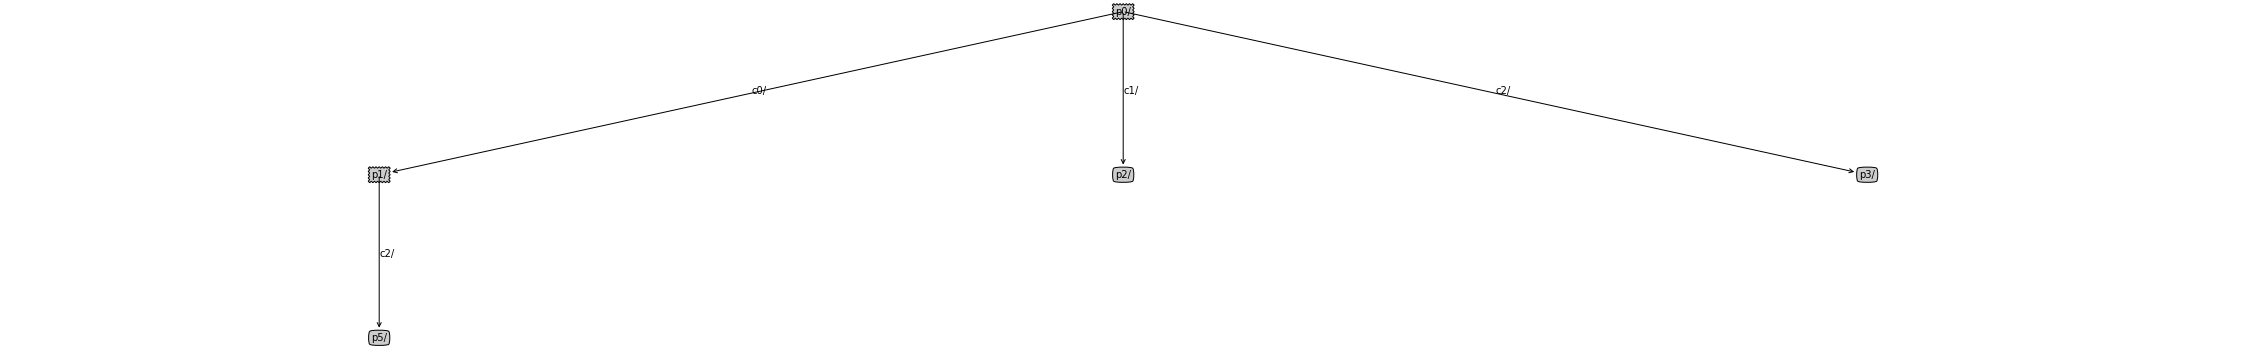

In [9]:
def get_item_id(item,list):
  id = 0
  while(id<len(list)):
    if item == list[id]:
      return id
    id = id + 1
  return None

def get_tree(node):
  nkey = ''
  for item in node.label:
    if get_item_id(item,permission)!=None:
      nkey = nkey + 'p'+ str(get_item_id(item,permission)) + '/'
      
  if len(node.edges)==0:
    return nkey  # leaf nodes

 
  
  tree = dict()
  subtree=dict()
  for e in node.edges: 
    ekey = ''
    for item in e.label:
      if get_item_id(item,constraints_order)!=None:
        ekey = ekey + 'c'+ str(get_item_id(item,constraints_order)) + '/'
    subtree[ekey]=get_tree(e.next_node)
  tree[nkey]=subtree
   # for sub_branch in get_all_branches(e.next_node):
   #   branches.append([node.label,e.label]+sub_branch)
  return tree

def visualization(pt):
  tree = get_tree(pt.root)
  print(tree)
  createPlot(tree)
print("Now we have the ordered permission tree opt_video.")
#print(opt_university)
visualization(opt_video)

{'p0/': {'c0/': {'p1/': {'c2/': 'p5/'}}, 'c1/': 'p2/', 'c2/': 'p3/'}}


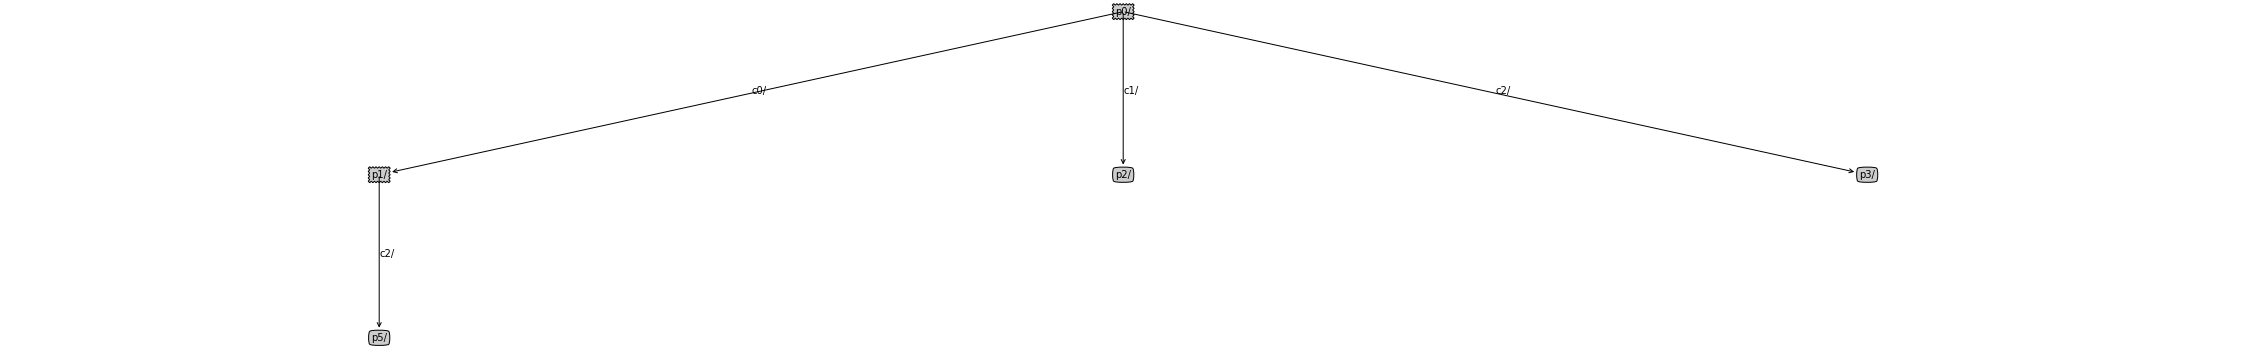

{'p0/': {'c0/': {'p1/': {'c2/': 'p5/'}}, 'c1/': 'p2/', 'c2/': 'p3/'}}


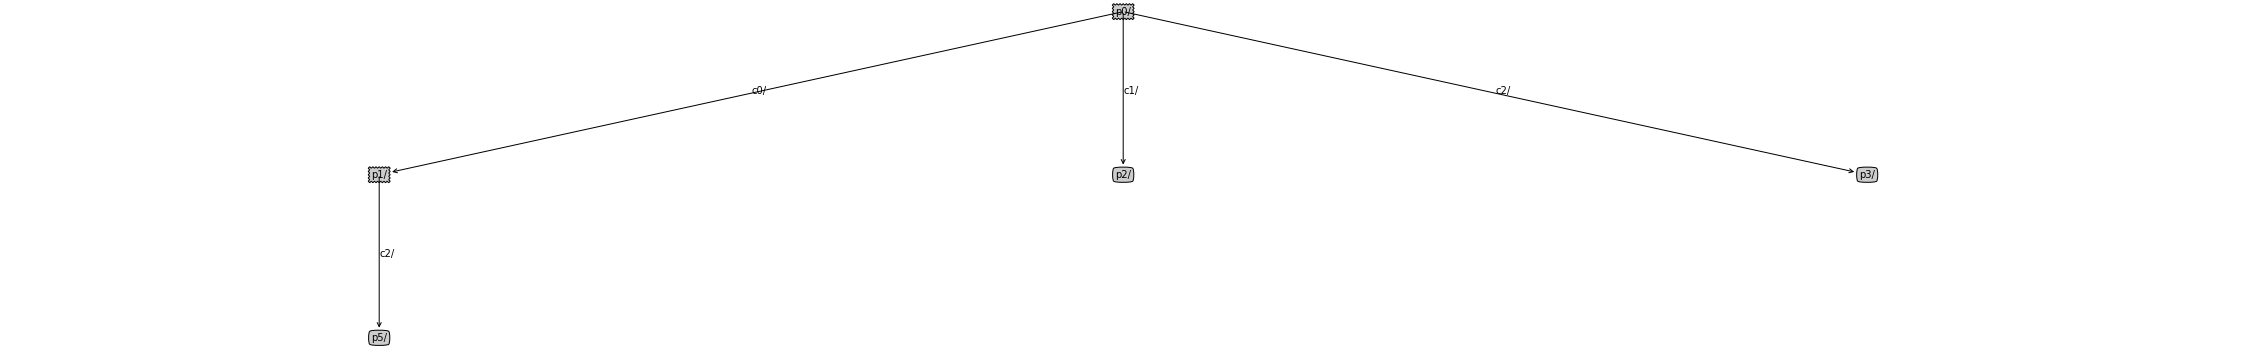

[[({'raing': [('is', 'G')], 'videoType': [('is', 'old')]}, ['view'])]]
[[({'raing': [('is', 'G')], 'videoType': [('is', 'old')]}, ['view'])], [('memberType', [('is', 'premium')])], [({'raing': [('is', 'G')]}, ['view'])]]
[[({'raing': [('is', 'G')], 'videoType': [('is', 'old')]}, ['view'])], [('ageGroup', [('is', 'teen')])], [({'raing': [('is', 'PG')], 'videoType': [('is', 'old')]}, ['view'])]]
[[({'raing': [('is', 'G')], 'videoType': [('is', 'old')]}, ['view'])], [('ageGroup', [('is', 'adult')])], [({'videoType': [('is', 'old')]}, ['view'])]]
[[({'raing': [('is', 'G')], 'videoType': [('is', 'old')]}, ['view'])], [('memberType', [('is', 'premium')])], [({'raing': [('is', 'G')]}, ['view'])]]
[[({'raing': [('is', 'G')], 'videoType': [('is', 'old')]}, ['view'])], [('memberType', [('is', 'premium')])], [({'raing': [('is', 'G')]}, ['view'])], [('ageGroup', [('is', 'teen')])], [({'raing': [('is', 'PG')]}, ['view'])]]
[[({'raing': [('is', 'G')], 'videoType': [('is', 'old')]}, ['view'])], [('me

In [10]:
import copy
attributes={'crs':['cs101','cs601','ee101','ee601'],'student':['csStu1','csStu2','applicant1'],'rdepartment':['registrar','admissions','ee','cs']}

def add_resource_constraint(node):
  length = len(node.edges)
  node_edges= copy.deepcopy(node.edges)
  need_to_remove=[]
  first = False
  for (er,operations) in node.label:
    flag = False
    for key in er.keys():# Only one variable constriants
      if (flag == True): 
        flag = False
        break
      for (op,c) in er[key]:
        if (flag==True):
          break
        elif op =='=' or op=='in': # find the (op,c) and er[key]
          flag = True
          if first == False:
            node.edges=[]
            first = True
          need_to_remove.append((er,operations))
          #print((er,operations))
          for value in attributes[key]:
            #print(er,operations,key,op,value,)
 
            er_new=copy.deepcopy(er)
            #print(er_new)
            #er_new[key].remove((op,c))
            er_new[key].append(('is',value))
            #print(er_new)
            new_node = Node()
            new_node.edges=node_edges
            new_node.parent_node=node
            new_node.label=[(er_new,operations)]
            if (er_new,operations) not in permission:
              permission.append((er_new,operations))
            new_edge = Edge(node,new_node)
            #er_new[key].remove((op,c))
            #edge_new=copy.deepcopy(er_new)
            #edge_new[key].remove((op,c))
            #new_edge.label=[(key,edge_new[key])]

            new_edge.label=[(key,er_new[key])]
            #if (op =='='):
            #  new_edge.label=[(c,er_new[key])] # change key into c
            if (key,er_new[key]) not in constraints_order:
                constraints_order.append((key,er_new[key]))
            
            #elif (op=='in'):
            #  new_edge.label=[(c,('is',[value]))]
            node.edges.append(new_edge)
            #if (key,er_new[key]) not in constraints_order:
            #    constraints_order.append((key,er_new[key]))
            
  for i in need_to_remove:
    node.label.remove(i)
  if length==0:  
    return node
  else:
    for e in node_edges:
      e.next_node=add_resource_constraint(e.next_node)

opt_de=copy.deepcopy(opt_video)
popt=add_resource_constraint(opt_de.root)
merge_edges(opt_de.root)
#print(opt_de)
visualization(opt_video)
visualization(opt_de)
def get_all_Branches(node):
  if len(node.edges)==0:
    return [[node.label]]
  branches = [[node.label]]
  for e in node.edges:
    for sub_branch in get_all_Branches(e.next_node):
      same_condition=True
      i = 1
      while i < len(sub_branch):
        label = sub_branch[i]
        for (key_e,value_e) in e.label:
          for (k,v) in label:
            if(key_e==k and v != value_e):
              same_condition=False

        i= i+2

      if(same_condition ==True):
        branches.append([node.label,e.label]+sub_branch)
  return branches
branches_de=get_all_Branches(opt_de.root)
for i in branches_de:
  print(i)
print(constraints_order)
print(permission)


In [16]:


RPA = dict() 
for i in range(len(branches_de)):
  RPA[i]=[]
  

# create user-role assignment
# find every branch that u satisfied 
# assign u to role such that thr role has the permission of ro 
URA = dict()
for u in U_v:
  URA[u['uid']]=[] #list of roles
  #role_id=0
  for bid in range(len(branches_de)):
    for r in R_v:
      for o in O_v:
        #({'type': ('is', 'gradebook'), 'crs': ('in', 'crsTaught')}, ['addScore', 'readScore'])-> pc
        #for role_id in BRPA[bid].keys():
        if(True):

          i = 1
          eu = dict()
          #er=dict()
          while i < len(branches_de[bid]):
            for (key,value) in branches_de[bid][i]:
              if(key in UA_v):
                eu[key]=value

            i = i +2
          for (er,operations) in branches_de[bid][-1]:#branches[bid][-1]:BRPA[bid][role_id]
            #er.update(er_small)
            expressions=[{'eu':eu,'er':er}]
            
            if satisfied(u,r,expressions) and o in operations:
              #print(expressions,o,r,u)
              if (r,o) not in RPA[bid]:
                RPA[bid].append((r,o))
              if bid not in URA[u['uid']]:
                URA[u['uid']].append(bid)


        #  for (er,operations) in branches[bid][-1]: #( dic, list) b[-1] is a list

print(RPA)
print(URA)

#print(RPA)
#print(URA)

def check_RBAC_policy(request,RPA,URA):
  u,r,o =request
  for role_id in URA[u['uid']]:
    if (r,o) in RPA[role_id]:
      return True

  return False

# check the RBAC policy 
number_allow=0
number_deny=0
for u in U_v:
  for r in R_v:
    for o in O_v:
      if(check_RBAC_policy((u,r,o),RPA,URA)==True):
        number_allow= number_allow+1
      else:
        number_deny =number_deny +1 
        #print(f'{u}\n{r}\n{o}\n \n')

print(f'For RBAC:\nNumber of allow:{number_allow}\nNumber of deny:{number_deny}')

# check the ABAC policy 
number_allow=0
number_deny=0
for u in U_v:
  for r in R_v:
    for o in O_v:
      if(check_ABAC_policy((u,r,o),ABAC_video)==True):
        number_allow= number_allow+1
      else:
        number_deny =number_deny +1 
        #print(f'{u}\n{r}\n{o}\n \n')

print(f'For ABAC:\nNumber of allow:{number_allow}\nNumber of deny:{number_deny}')


#number_allow=0
#number_deny=0

correct=0
for u in U_v:
  for r in R_v:
    for o in O_v:
      if (check_ABAC_policy((u,r,o),ABAC_video)==True and check_RBAC_policy((u,r,o),RPA,URA)==False):
        print(f'TF{u} {r} {o}')
      elif (check_ABAC_policy((u,r,o),ABAC_video)==False and check_RBAC_policy((u,r,o),RPA,URA)==True):
        print(f'FT{u} {r} {o}')
        #number_allow= number_allow+1
      elif (check_ABAC_policy((u,r,o),ABAC_video)==True and check_RBAC_policy((u,r,o),RPA,URA)==True):
        correct = correct +1
      elif (check_ABAC_policy((u,r,o),ABAC_video)==False and check_RBAC_policy((u,r,o),RPA,URA)==False):
        correct = correct +1
        #number_deny =number_deny +1 
        #print(f'{u}\n{r}\n{o}\n \n')

print(f'For number of correct:{correct}')


{0: [], 1: [], 2: [], 3: [({'rid': 'the_lion_king', 'rating': 'G', 'videoType': 'old'}, 'view'), ({'rid': 'toy_story', 'rating': 'G', 'videoType': 'old'}, 'view'), ({'rid': 'star_wars', 'rating': 'PG', 'videoType': 'old'}, 'view'), ({'rid': 'jaws', 'rating': 'PG', 'videoType': 'old'}, 'view'), ({'rid': 'brave_heart', 'rating': 'R', 'videoType': 'old'}, 'view'), ({'rid': 'my_cousin_vinny', 'rating': 'R', 'videoType': 'old'}, 'view')], 4: [], 5: [], 6: [], 7: [({'rid': 'the_lion_king', 'rating': 'G', 'videoType': 'old'}, 'view'), ({'rid': 'toy_story', 'rating': 'G', 'videoType': 'old'}, 'view'), ({'rid': 'star_wars', 'rating': 'PG', 'videoType': 'old'}, 'view'), ({'rid': 'jaws', 'rating': 'PG', 'videoType': 'old'}, 'view'), ({'rid': 'brave_heart', 'rating': 'R', 'videoType': 'old'}, 'view'), ({'rid': 'my_cousin_vinny', 'rating': 'R', 'videoType': 'old'}, 'view'), ({'rid': 'happy_feet', 'rating': 'G', 'videoType': 'new'}, 'view'), ({'rid': 'happy_feet_2', 'rating': 'G', 'videoType': 'new'

Dataset video is the simplest situation when no resource constraints 
depend on users.
